In [41]:
# IMPORTS
from dockembeddings import train_docModel, load_docModel, vec_docEmbeddings
from hierarchical_clustering import hierarchical_clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import time
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

data_dir = "."
doc2vec_model_file = 'my_doc2vec_n200.model'
train_file = 'verbalAutopsy_train.csv'
test_file = 'verbalAutopsy_test.csv'

Vectorización

In [49]:
# Lee los datos
train = pd.read_csv(train_file)

# Define los intervalos de edad
bins = [0, 20, 40, 60, float('inf')]  # Los límites de los intervalos

# Define las etiquetas para cada intervalo
labels = ['0-20', '21-40', '41-60', '60+']

# Crea una nueva columna en el DataFrame que representa los intervalos de edad
train['age_interval'] = pd.cut(train['age'], bins=bins, labels=labels, right=False)

# Muestra los primeros registros con la nueva columna
#print(train[['age', 'age_interval']].head())


train_0_20 = train[train['age_interval'] == '0-20']
train_21_40 = train[train['age_interval'] == '21-40']
train_41_60 = train[train['age_interval'] == '41-60']
train_60_plus = train[train['age_interval'] == '60+']

#print(train_0_20.head())
#print("-----------------------------------")
print(train_21_40.head())
print("-----------------------------------")
print(train_41_60.head())

x_train=train['open_response']
y_train=train['gs_text34']

x_train_0_20 = train_0_20['open_response']
y_train_0_20= train_0_20['gs_text34']

x_train_21_40 = train_21_40['open_response']
y_train_21_40= train_21_40['gs_text34']

x_train_41_60 = train_41_60['open_response']
y_train_41_60= train_41_60['gs_text34']

x_train_60_plus = train_60_plus['open_response']
y_train_60_plus= train_60_plus['gs_text34']

#print(x_train.head())
#print(y_train.head())

# Obtenemos la vectorizacion de los documentos -> [(index, vector)]
# Entrenamos el modelo
# train_docModel(pd.read_csv(train_file)['open_response'], model_file)
#docModel = load_docModel(doc2vec_model_file)
#x_train = list(vec_docEmbeddings(x_train, docModel))

    newid module   age  sex site  \
2    3667  Adult  23.0    2   AP   
15   7538  Adult  20.0    1   UP   
17   3218  Adult  25.0    2   UP   
26   1503  Adult  34.0    1   UP   
28   1235  Adult  24.0    2   UP   

                                        open_response  gs_text34 age_interval  
2   i took my wife to a private hospital for tubec...   Maternal        21-40  
15                     the deceased had been poisoned    Suicide        21-40  
17  the deceased was # months pregnant the child h...   Maternal        21-40  
26  the deceased had been working in place for the...       AIDS        21-40  
28  the deceased suffered an ulcer in the stomach ...  Cirrhosis        21-40  
-----------------------------------
    newid module   age  sex   site  \
3     452  Adult  40.0    1     AP   
4    2904  Adult  55.0    1     UP   
8    6334  Adult  54.0    2  Bohol   
10   2920  Adult  45.0    1     UP   
11   7718  Adult  55.0    2     UP   

                                      

In [50]:
# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, x_train, y_train):
    #vectorizer = TfidfVectorizer()
    #x_train_vec = vectorizer.fit_transform(x_train)
    print(x_train)
    vectorizer = CountVectorizer()
    x_train_vec = vectorizer.fit_transform(x_train)
    # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
        x_train_vec, y_train, test_size=0.2, random_state=42
    )
    
    # Entrenar el modelo
    model.fit(x_train_split, y_train_split)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test_split)

    # Calcular el F-score
    f_score = f1_score(y_test_split, y_pred, average='weighted')
    return f_score

In [47]:
# Inicializar modelos
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=500)
svm_model = SVC()

In [51]:
models=["nb","lr","svm"]
f_scores = []
# Iterar sobre los modelos
for model_type in models:
    # Obtener el modelo correspondiente
    if model_type == "nb":
        model = MultinomialNB()
    elif model_type == "lr":
        model = LogisticRegression(max_iter=500)
    elif model_type == "svm":
        model = SVC()

# Almacenar F-scores para cada intervalo de edad
    
    f_scores_interval = []
  # Entrenar y evaluar el modelo con el conjunto de datos específico
    f_score = train_and_evaluate_model(model, x_train, y_train)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_0_20, y_train_0_20)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_21_40, y_train_21_40)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_41_60, y_train_41_60)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_60_plus, y_train_60_plus)
    f_scores_interval.append(f_score)
    f_scores.append((model_type, f_scores_interval))

0       date he felt a lower back pain and had fever s...
1                         the caese of death is pneumonia
2       i took my wife to a private hospital for tubec...
3       he went to the work on sunday there were # iro...
4       the deceased had died due to a snake bite the ...
                              ...                        
5204    the deceased fell ill in the morning his breat...
5205    the respondant expained that the decease death...
5206    the deceased had been admitted to hospital whe...
5207    the deceased had been suffering from breathing...
5208    the deceased died because of being hitted by a...
Name: open_response, Length: 5209, dtype: object
1                         the caese of death is pneumonia
5       june # year respondent experienced pain on the...
6       when the consult doctor saw patient he said th...
9       the deceased had been ill for about a year and...
13      the client thanked for service the client thro...
                       

C:\Users\alvar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1                         the caese of death is pneumonia
5       june # year respondent experienced pain on the...
6       when the consult doctor saw patient he said th...
9       the deceased had been ill for about a year and...
13      the client thanked for service the client thro...
                              ...                        
5194    the scorpion had bitten patient in his house b...
5195    child was suffering from headache since mornin...
5199    press clipping was also there child died becau...
5201    child had the habit of eating soil very much b...
5205    the respondant expained that the decease death...
Name: open_response, Length: 2066, dtype: object


C:\Users\alvar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2       i took my wife to a private hospital for tubec...
15                         the deceased had been poisoned
17      the deceased was # months pregnant the child h...
26      the deceased had been working in place for the...
28      the deceased suffered an ulcer in the stomach ...
                              ...                        
5175    the deceased had been # months pregnant and di...
5180    patient had very high fever and severe body pa...
5192    i think he was not taken care of properly the ...
5198    dropsy and swelling was there in the entire bo...
5208    the deceased died because of being hitted by a...
Name: open_response, Length: 1027, dtype: object
3       he went to the work on sunday there were # iro...
4       the deceased had died due to a snake bite the ...
8       # she was admitted in hospital because it was ...
10      the deceased suddenly caught a fever and start...
11      the deceased had been suffering from arthritis...
                       

C:\Users\alvar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0       date he felt a lower back pain and had fever s...
7       the deceased had been suffering from coughing ...
14      year # she was admitted in hospital due to dif...
21      patient had been sick for the past five years ...
30      march # year he was hurt by a cow but he didn'...
                              ...                        
5200    the deceased would lose her breath and wheneve...
5202    he was suffering form the time he got a heart ...
5203    he got heart stroke at ten in the morning on s...
5206    the deceased had been admitted to hospital whe...
5207    the deceased had been suffering from breathing...
Name: open_response, Length: 1092, dtype: object


C:\Users\alvar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0       date he felt a lower back pain and had fever s...
1                         the caese of death is pneumonia
2       i took my wife to a private hospital for tubec...
3       he went to the work on sunday there were # iro...
4       the deceased had died due to a snake bite the ...
                              ...                        
5204    the deceased fell ill in the morning his breat...
5205    the respondant expained that the decease death...
5206    the deceased had been admitted to hospital whe...
5207    the deceased had been suffering from breathing...
5208    the deceased died because of being hitted by a...
Name: open_response, Length: 5209, dtype: object
1                         the caese of death is pneumonia
5       june # year respondent experienced pain on the...
6       when the consult doctor saw patient he said th...
9       the deceased had been ill for about a year and...
13      the client thanked for service the client thro...
                       

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

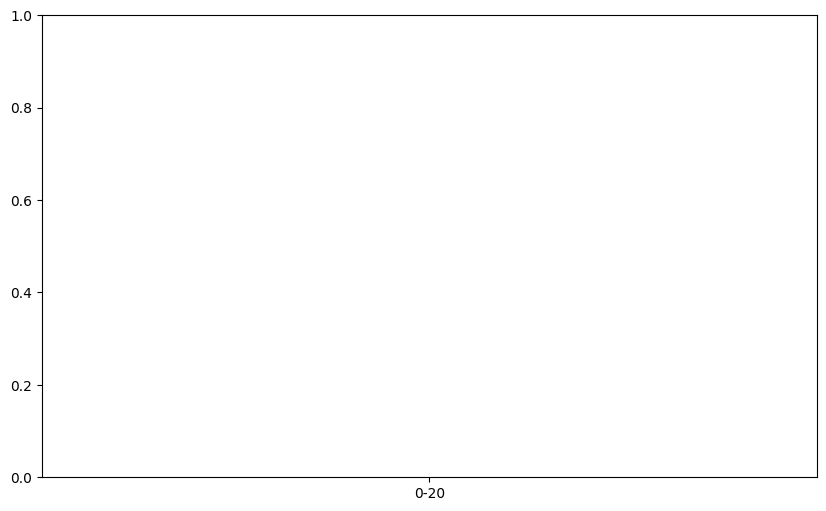

In [52]:
plt.figure(figsize=(10, 6))

intervalos_edad = [ 'all','0-20', '21-40', '41-60', '60+']

for model_type, f_scores_interval in f_scores:
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Graficar los resultados para cada intervalo de edad
    plt.plot(intervalos_edad, f_scores_interval, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.legend()
plt.show()